In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [32]:
# Load dataset
dataset_path = "/Users/hardikagrawal/Documents/STUDY MATERIAL/Machine Learning/Projects/Rock:Paper:Scissors hand gestures detector/Training Data"  # Update with your dataset path
batch_size = 32
img_size = (200, 300)



In [33]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path, validation_split=0.2, subset="training", seed=42,
    image_size=img_size, batch_size=batch_size
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path, validation_split=0.2, subset="validation", seed=42,
    image_size=img_size, batch_size=batch_size
)



Found 2188 files belonging to 3 classes.
Using 1751 files for training.
Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [34]:
normalization_layer = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))


In [35]:
# def adjust_labels(image, label):
#     label = label -1  # Shift the labels to 0, 1, 2 instead of 1, 2, 3
#     return image, label

# # Apply label adjustment to the datasets
# train_data = train_data.map(adjust_labels)
# val_data = val_data.map(adjust_labels)


In [36]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes: rock, paper, scissors
])


In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [38]:
history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 43s 777ms/step - accuracy: 0.5203 - loss: 1.0042 - val_accuracy: 0.8375 - val_loss: 0.4818
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 34s 617ms/step - accuracy: 0.8375 - loss: 0.4741 - val_accuracy: 0.8352 - val_loss: 0.4594
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 34s 615ms/step - accuracy: 0.8950 - loss: 0.3598 - val_accuracy: 0.9176 - val_loss: 0.2492
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 43s 781ms/step - accuracy: 0.9193 - loss: 0.2621 - val_accuracy: 0.9314 - val_loss: 0.1984
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 704ms/step - accuracy: 0.9513 - loss: 0.1702 - val_accuracy: 0.9451 - val_loss: 0.1650
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 684ms/step - accuracy: 0.9569 - loss: 0.1298 - val_accuracy: 0.9565 - val_loss: 0.1291
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 37s 666ms/step - accuracy: 0.9676 - loss: 0.1096 - val_accuracy: 0.9634 - val_loss: 0.1149
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 748ms/step - accuracy: 0.9741 - loss: 0.0804 - val_accu

In [39]:
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.9762 - loss: 0.0601
Validation Accuracy: 0.97


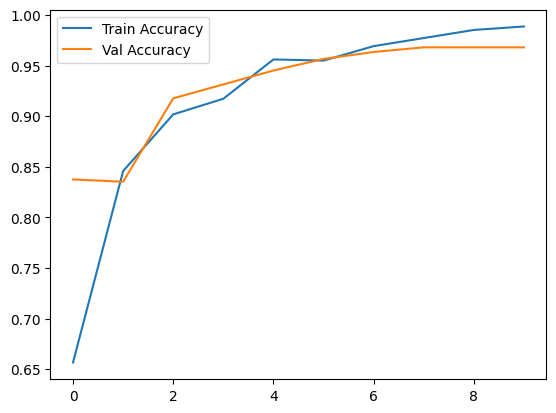

(<matplotlib.legend.Legend at 0x3139c5370>, None)

In [40]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(), plt.show()

In [42]:
model.save("rps_classifier2.h5")


2025-02-18 22:17:58.588870: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/hardikagrawal/Documents/STUDY MATERIAL/Machine Learning/Projects/Rock:Paper:Scissors hand gestures detector/paper/41HC0VBlHSRhi0AG.png; No such file or directory
2025-02-18 22:17:58.589083: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/hardikagrawal/Documents/STUDY MATERIAL/Machine Learning/Projects/Rock:Paper:Scissors hand gestures detector/paper/ywXiLajxMzhy7BST.png; No such file or directory
2025-02-18 22:17:58.589104: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/hardikagrawal/Documents/STUDY MATERIAL/Machine Learning/Projects/Rock:Paper:Scissors hand gestures detector/paper/9yGlnLxGtzq1gJti.png; No such file or directory
2025-02-18 22:17:58.589116: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQU